In [1]:
import numpy as np
import scipy.integrate as spqd
import matplotlib.pyplot as plt
%matplotlib inline

**Problem 1** - 3 pts: So, the Binomial Theorem is one of those things that is often nice to know.  The theorem says for $n$ a positive integer that 

$$
(x+y)^{n} = \sum_{l=0}^{n}\begin{pmatrix} n \\ l \end{pmatrix} x^{l}y^{n-l}, ~ \begin{pmatrix} n \\ l\end{pmatrix} = \frac{n!}{l!(n-l)!}.
$$

1a. Using the Binomial Theorem show
$$
(x+y)^{2} = x^{2} + 2xy + y^2, ~ (x+y)^{3} = x^{3} + 3x^2y + 3xy^2 + y^3
$$
Show all steps by way of the Binomial Theorem, i.e. do not just foil and write down the result.  

1b.  Using your results above and Pascal's triangle 
![PT](https://upload.wikimedia.org/wikipedia/commons/c/ca/Pascal_triangle_small.png)
find the expansion of 
$$
(x+y)^{8}
$$
Note, if you understand how Pascal's triangle works, then this should not require much work, i.e. do not foil or use the Binomial Theorem directly.   

1c. Using the pattern you see in Pascal's triangle, can you provide an explanation (not proof) for why the identity 
$$
\begin{pmatrix} n + 1 \\ l \end{pmatrix} = \begin{pmatrix} n \\ l-1 \end{pmatrix} + \begin{pmatrix} n \\ l \end{pmatrix}
$$
is true?

_Answers to Problem 1_

**Problem 2** - 2pts each

2a.  What does the Python code 

`print(np.linspace(0,1,11))` 

do?  (To answer this run the code and then briefly explain the result.)

2b. What does the Python code 

`print(np.linspace(0,10,11))` 

do? (To answer this run the code and then briefly explain the result.)

2c. In general then, explain what the command 

`np.linspace(a,b,n+1)` 

does for arbitrary real values $a$ and $b>a$, and positive integer value $n$.  

_Answers to Problem 2_

In [4]:
# 2a)
print(np.linspace(0,1,11))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


We see this creates 11 points from 0 to 1 increasing in increments of $.1$

In [5]:
# 2b)
print(np.linspace(0,10,11))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


We see this creates 11 points from 0 to 1 increasing in increments of 1.

#### 2c)
We see in general that when we write something like 

` 
xvals = np.linspace(a,b,int(n)+1)
`

we are generating a sequence of points $x_{j}$ such that 

$$
\mbox{xvals[j]} = x_{j}, ~ x_{j} = a + j\delta x, ~ \delta x = \frac{b-a}{n}, ~ j=0,\cdots,n.
$$


**Problem 3**: 3pts each - So if we start with a numpy array like

`
xvals = np.linspace(0.,2.,int(1e3))
`

then if we wanted to plot $f(x)=x^2$ for $0\leq x \leq 2$, we would just have to write 

`
yvals = xvals**2
plt.plot(xvals,yvals)
`

This shows how using NumPy arrays allows us to do arithmetic over multiple points at a time.  

3a. Plot $f(x) = x^3 + 3x^2 + 2x + 1$ over $-2\leq x \leq 2.1$.  Provide labels and make sure your plot window is well sized and fits the domain over which you are plotting.

3b. In Python, write the command to create a NumPy array of points between and including $x=1$ and $11$ with spacing between the points equal to $.1$.  

3c. What is the spacing between points in the array `np.linspace(1.3,2.4,int(5e2))`?  Note, do not just print out the points, take the difference, and report the result.  

_Answers to Problem 3_

(-2.0, 2.1)

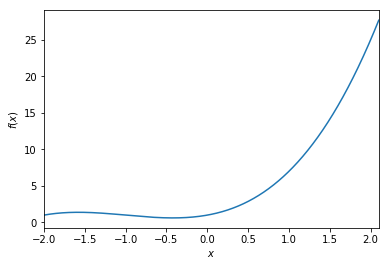

In [7]:
#3a)

xvals = np.linspace(-2,2.1,int(1e3)+1)
fvals = xvals**3. + 3.*xvals**2. + 2.*xvals + 1.
plt.plot(xvals,fvals)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim([-2.,2.1])

#### 3b)

We have that 
$$
n = (11-1)/.1 = 100
$$
so we use the code

In [8]:
# 3b
xvals = np.linspace(1,11,100+1)

#### 3c)
We have that 
$$
\delta x = \frac{2.4-1.3}{500-1} = \frac{1.1}{499} = .0022044088
$$

**Problem 4**: For the integral

$$
I = \int_{0}^{\pi/3} \sin(e^{x})dx
$$

using $I$ found from Python's built in integrating tools   

In [4]:
Iarr = spqd.quad(lambda x: np.sin(np.exp(x)), 0, np.pi/3.)
I = Iarr[0]
print("I=%1.15f" %I)

I=0.891489668563799


for reference, determine the accuracy in using 

a) (3pts) A two term Taylor series approximation starting at $x_{0}=0$, i.e. $T_{2}(x;x_{0}=0)$ to approximate $I$.

b) (3pts) A two term Taylor series approximation starting at $x_{0}=\frac{\pi}{6}$, i.e. $T_{2}(x;x_{0}=\frac{\pi}{6})$ to approximate $I$.

c) (5pts) Two different Taylor series approximations, say $T_{2}(x;x_{0}=0)$ on the interval $[0,\pi/6]$ and 
$T_{2}(x;x_{0}=\frac{\pi}{6})$ on $[\pi/6,\pi/3]$ to approximate $I$.  

Use the code in lecture to help you manage the computations and produce your results.  Show all relevant work, and provide a brief explanation at the end for which is the best approximation and why.

_Answers to Problem 4_

So as many figured out, the easiest thing to do is start from the general form of your two term Taylor series, given by 

$$
T_{2}(x;x_{0}) = f(x_{0}) + f'(x_{0})(x-x_{0}) + \frac{1}{2}f''(x_{0})(x-x_{0})^{2}
$$

so over any interval of integration $[a,b]$ we have the approximate integral $\tilde{I}(x_{0},a,b)$ given by 

\begin{align*}
\tilde{I}(x_{0},a,b) = & \int_{a}^{b}T_{2}(x;x_{0})dx \\
= & f(x_{0})(b-a) + \frac{1}{2}f'(x_{0})\left((b-x_{0})^{2} - (a-x_{0})^{2}\right) \\
& + \frac{1}{6}f''(x_{0})\left((b-x_{0})^{3} - (a-x_{0})^{3}\right)
\end{align*}

Thus the three approximations can be found by evaluating 
* $\tilde{I}(0,0,\pi/3)$
* $\tilde{I}(\pi/6,0,\pi/3)$
* $\tilde{I}(0,0,\pi/6) + \tilde{I}(\pi/6,\pi/6,\pi/3)$

In [5]:
def ffun(x):
    return np.sin(np.exp(x))

def dxffun(x):
    return np.cos(np.exp(x))*np.exp(x)

def dx2ffun(x):
    return np.cos(np.exp(x))*np.exp(x) - np.sin(np.exp(x))*np.exp(2.*x)

def int_tseries(x0,a,b):
    av = ffun(x0)*(b-a)
    bv = dxffun(x0)*((b-x0)**2.-(a-x0)**2.)/2.
    cv = dx2ffun(x0)*((b-x0)**3.-(a-x0)**3.)/6.
    return (av+bv+cv)

p3 = np.pi/3.
p3h = p3/2.
zv = 0.

a1 = int_tseries(zv,zv,p3)
a2 = int_tseries(p3h,zv,p3)
a3 = int_tseries(zv,zv,p3h)+int_tseries(p3h,p3h,p3)

print("First Approximation gives: %1.15f"%a1)
print("Error of First Approximation is: %1.15f"%np.abs(a1-I))
print()
print("Second Approximation gives: %1.15f"%a2)
print("Error of Second Approximation is: %1.15f"%np.abs(a2-I))
print()
print("Third Approximation gives: %1.15f"%a3)
print("Error of Third Approximation is: %1.15f"%np.abs(a3-I))

First Approximation gives: 1.119797532203620
Error of First Approximation is: 0.228307863639821

Second Approximation gives: 0.895132601143736
Error of Second Approximation is: 0.003642932579937

Third Approximation gives: 0.927937638130558
Error of Third Approximation is: 0.036447969566759


As we see from the results, the first approximation scheme gives an error of about 22%.  Using the interval splitting technique discussed in class, the third approximation scheme reduces the error to about 3%, which is a significant improvement.  However, we see that the best performance comes from using the midpoint of the interval in the second approximation, which reduces the error to almost a tenth of a percent.    